<a href="https://colab.research.google.com/github/Yatagarasu50469/Guided-Filteration/blob/master/programming_assignment2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
import scipy
import skimage
from skimage import feature
from skimage import filters
from skimage.filters import *
import numpy as np

!wget https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg

--2021-09-27 21:47:38--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/Marquette.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482326 (471K) [image/jpeg]
Saving to: ‘Marquette.jpg’

Marquette.jpg       100%[===================>] 471.02K  --.-KB/s    in 0.004s  

2021-09-27 21:47:38 (128 MB/s) - ‘Marquette.jpg’ saved [482326/482326]



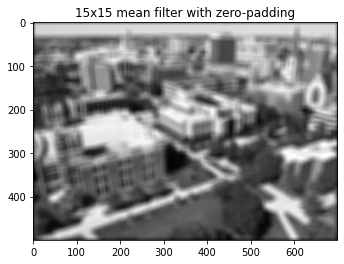

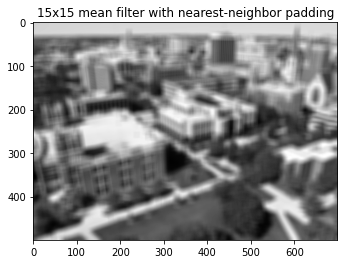

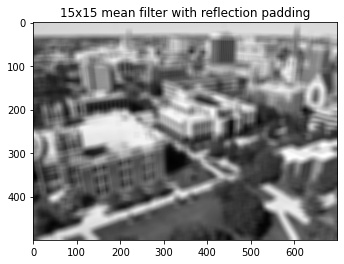

In [2]:
# Convolve the image `Marquette.jpg' with a 15x15 mean filter using the following padding strategies: 
#Zero padding, Nearest neighbor, reflect. Visually compare the results.

img = cv2.imread('Marquette.jpg',0)
kernel = np.ones((15,15))/15**2
result = scipy.ndimage.filters.convolve(img,kernel,mode='constant', cval=0.0)
plt.imshow(result,cmap='gray')
plt.title('15x15 mean filter with zero-padding')
plt.show()

result = scipy.ndimage.filters.convolve(img,kernel,mode='nearest')
plt.imshow(result,cmap='gray')
plt.title('15x15 mean filter with nearest-neighbor padding')
plt.show()

result = scipy.ndimage.filters.convolve(img,kernel,mode='reflect')
plt.imshow(result,cmap='gray')
plt.title('15x15 mean filter with reflection padding')
plt.show()



Maximum image value is: 255
Minimum image value is: 18


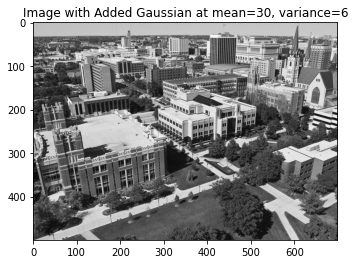

In [3]:
# Create a numpy array with the same size as the image `Marquette.jpg' containing Gaussian noise with 
#mean 30 and variance 6 and add the two images (make sure the pixels in the resulting image are in the 
#range [0, 255])
img = cv2.imread('Marquette.jpg',0)
mean = 30
variance = 6
sigma = variance**0.5
gaussNoise = np.random.normal(mean, sigma, img.shape)
noisy_img = np.add(img, gaussNoise)
noisy_img = ((noisy_img/np.max(noisy_img))*255).astype('uint8')
print('Maximum image value is:', np.max(noisy_img))
print('Minimum image value is:', np.min(noisy_img))
plt.imshow(noisy_img,cmap='gray')
plt.title('Image with Added Gaussian at mean=30, variance=6')
plt.show()


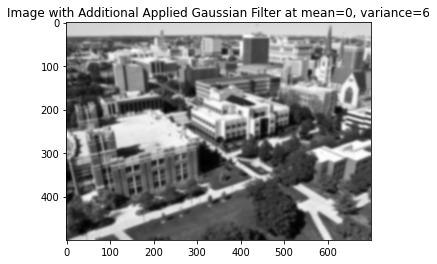

In [4]:
# Apply a Gaussian filter with mean 0 and variance 6 to the image and display the resulting image.
variance=6
sigma = variance**0.5
appliedGaussian = scipy.ndimage.gaussian_filter(noisy_img, sigma)
plt.imshow(appliedGaussian,cmap='gray')
plt.title('Image with Additional Applied Gaussian Filter at mean=0, variance=6')
plt.show()



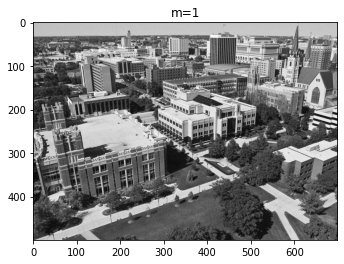

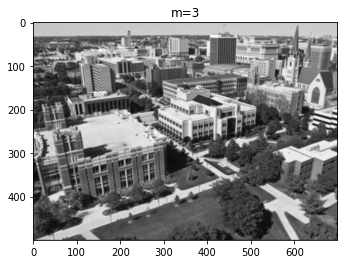

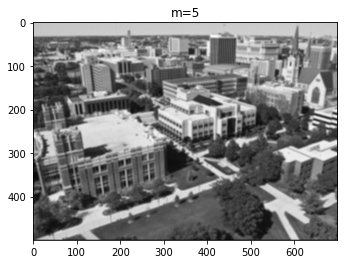

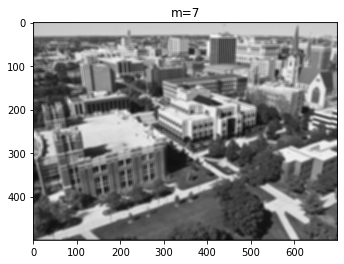

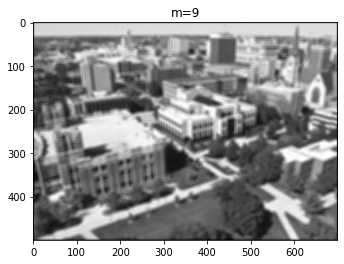

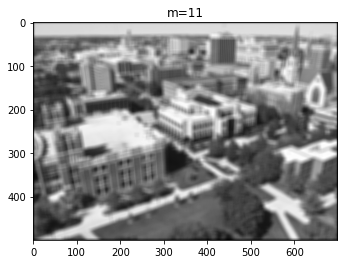

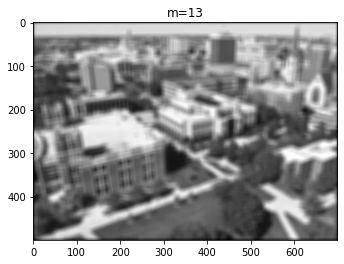

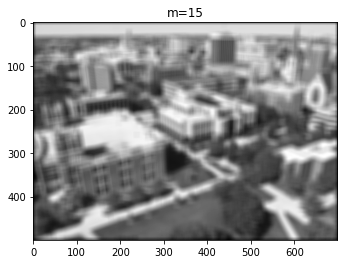

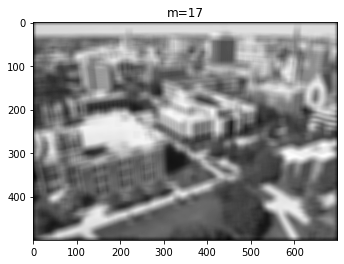

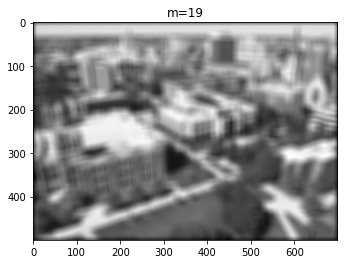

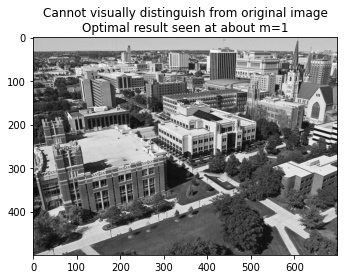

In [5]:
# Apply a mean filter to the image corrupted with noise. Experiment with the filter size to optimize the results.
mChoices = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
for m in mChoices:
  kernel = np.ones((m,m))/m**2
  result = scipy.ndimage.filters.convolve(noisy_img, kernel,mode='constant', cval=0.0)
  plt.imshow(result,cmap='gray')
  plt.title('m='+str(m))
  plt.show()

m = 1
kernel = np.ones((m,m))/m**2
plt.imshow(scipy.ndimage.filters.convolve(noisy_img, kernel,mode='constant', cval=0.0),cmap='gray')
plt.title('Cannot visually distinguish from original image\nOptimal result seen at about m='+str(m))
plt.show()

Maximum image value is: 255
Minimum image value is: 0


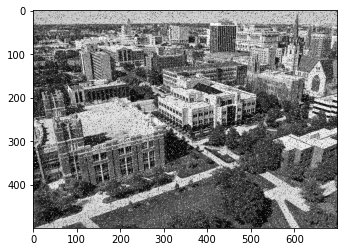

In [6]:
# Create a numpy array with the same size as the image `Marquette.jpg' containing impulse noise where 
#the probability that a pixel is corrupted is 10% and add the two images (make sure the pixels in the 
#resulting image are in the range [0, 255])

img = cv2.imread('Marquette.jpg',0)
impulseImage = np.zeros(img.shape)

#Get 10% of locations
locations = np.transpose(np.where(np.zeros(img.shape)==0))
np.random.shuffle(locations)
locations = locations[:int(np.ceil((0.1*img.shape[0]*img.shape[1])))]

#Split into salt-and-pepper sets, setting values as +/- 255
saltLocations, pepperLocations = np.split(locations, 2)
impulseImage[saltLocations[:,0], saltLocations[:,1]] = 255
impulseImage[pepperLocations[:,0], pepperLocations[:,1]] = -255

#Add the images together
corruptedImage = np.add(img.astype('uint16'), impulseImage)

#Limit pixel ranges and reset type
corruptedImage[corruptedImage>255] = 255
corruptedImage[corruptedImage<0] = 0
corruptedImage = corruptedImage.astype('uint8')

print('Maximum image value is:', np.max(corruptedImage))
print('Minimum image value is:', np.min(corruptedImage))
plt.imshow(corruptedImage, cmap='gray')
plt.show()
plt.close()

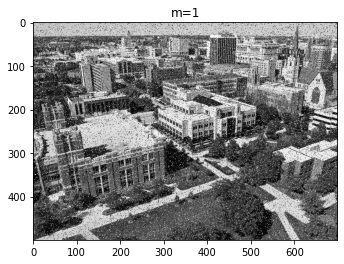

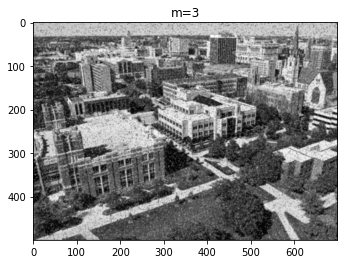

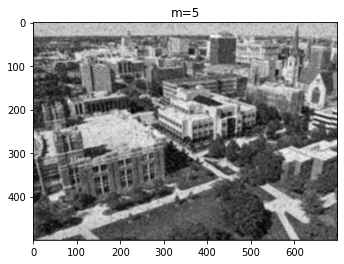

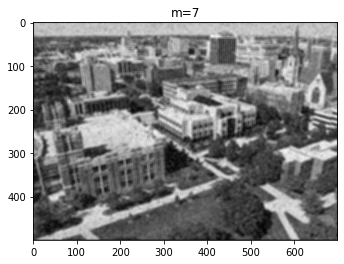

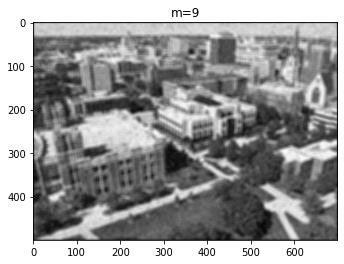

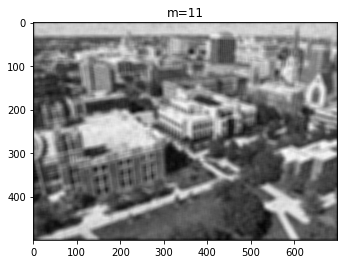

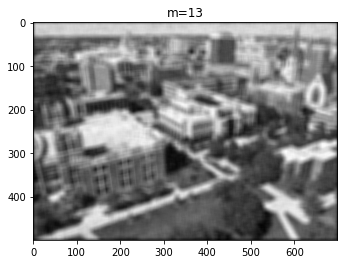

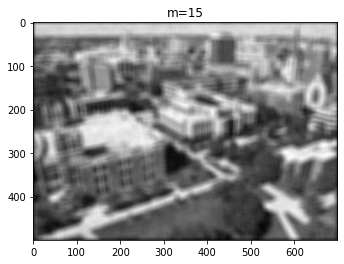

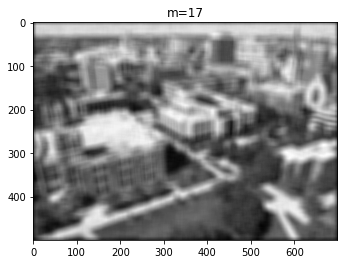

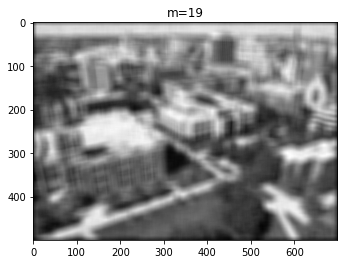

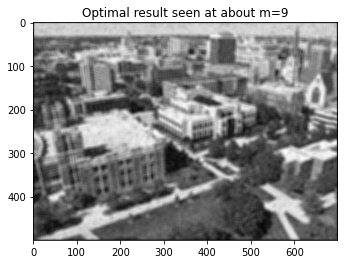

In [7]:
# Apply a mean filter to the image corrupted with noise. Experiment with the filter size to optimize the results.
mChoices = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
for m in mChoices:
  kernel = np.ones((m,m))/m**2
  result = scipy.ndimage.filters.convolve(corruptedImage, kernel,mode='constant', cval=0.0)
  plt.imshow(result,cmap='gray')
  plt.title('m='+str(m))
  plt.show()

m = 9
kernel = np.ones((m,m))/m**2
plt.imshow(scipy.ndimage.filters.convolve(corruptedImage, kernel,mode='constant', cval=0.0),cmap='gray')
plt.title('Optimal result seen at about m='+str(m))
plt.show()

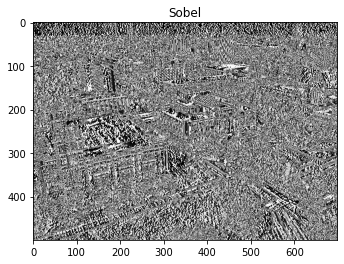

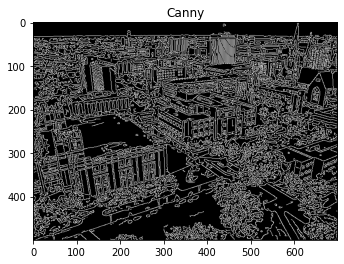

In [8]:
# Apply the Sobel edge detector and the Canny edge detector to the image `Marquette.jpg' and visually 
#compare the results.

img = cv2.imread('Marquette.jpg',0)

sobelImage = scipy.ndimage.filters.sobel(img, mode='constant', cval=0.0)
cannyImage = skimage.feature.canny(img)

plt.imshow(sobelImage, cmap='gray')
plt.title('Sobel')
plt.show()
plt.close()

plt.imshow(cannyImage, cmap='gray')
plt.title('Canny')
plt.show()
plt.close()